In [2]:
%matplotlib inline
from dyson.logger import *
import numpy as np
import dyson.calculator as calc
import dyson.weight as weight
import dyson.model as model
import dyson.lattice as lat
from dyson.weight import UP,DOWN,IN,OUT
import dyson.parameter as parameter
import dyson.plot as plot
ParaFile="0_DYSON_para"
WeightFile="Weight"
para=parameter.LoadPara(ParaFile)
WeightPara={"NSublat": para["Lattice"]["NSublat"], "L":para["Lattice"]["L"],
                "Beta": float(para["Tau"]["Beta"]), "MaxTauBin": para["Tau"]["MaxTauBin"]}
Map=weight.IndexMap(**WeightPara)
Lat=lat.Lattice(para["Lattice"]["Name"], Map)
data=IO.LoadBigDict(WeightFile)
Factory=model.BareFactory(Map, Lat,  para["Model"], para["Dyson"]["Annealing"])
G0,W0=Factory.Build()
G=weight.Weight("SmoothT", Map, "TwoSpins", "AntiSymmetric", "R", "T").FromDict(data["G"])
W=weight.Weight("SmoothT", Map, "FourSpins", "Symmetric","R","T").FromDict(data["W"])
SigmaDeltaT=weight.Weight("DeltaT", Map, "TwoSpins", "AntiSymmetric","R").FromDict(data["SigmaDeltaT"])
Sigma=weight.Weight("SmoothT", Map, "TwoSpins", "AntiSymmetric","R","T").FromDict(data["Sigma"])
Polar=weight.Weight("SmoothT", Map, "FourSpins", "Symmetric","R","T").FromDict(data["Polar"])
Chi=weight.Weight("SmoothT", Map, "NoSpin", "Symmetric","R","T").FromDict(data["Chi"])

INFO:root:Loading Parameters...


calculator
[calc][15/03/04 20:07:27][INFO]:
Loading Parameters...


INFO:root:set Mu=1.0471975512j, Hopping=[ 0.], and SmoothT Bare G


[calc][15/03/04 20:07:28][INFO]:
set Mu=1.0471975512j, Hopping=[ 0.], and SmoothT Bare G


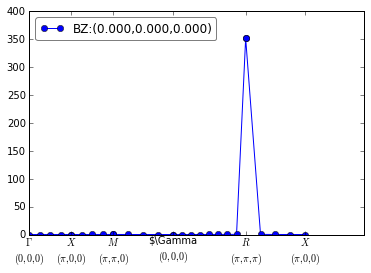

In [3]:
plot.PlotChiAlongPath(Chi, Lat, False)

INFO:root:Max:0.234083004847, Min: -0.276912268869


[calc][15/03/04 20:07:29][INFO]:
Max:0.234083004847, Min: -0.276912268869


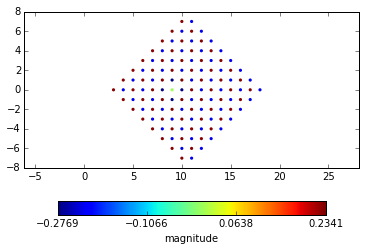

In [4]:
plot.PlotSpatial(Chi, Lat, 0, 0, False)

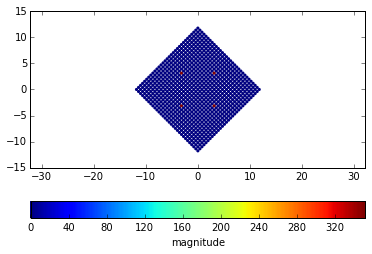

INFO:root:Plotting done!


[calc][15/03/04 20:07:30][INFO]:
Plotting done!


In [5]:
plot.PlotChi_2D(Chi, Lat, False)

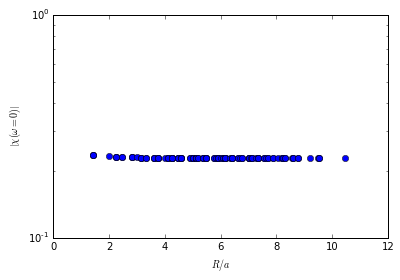

In [6]:
plot.PlotWeightvsR("\chi", Chi,Lat,0,0,0, False)

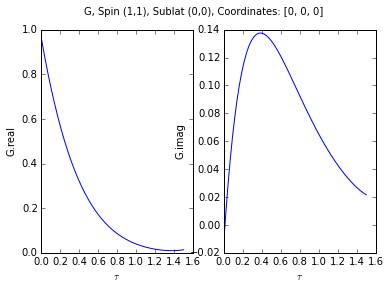

In [7]:
plot.PlotTime("G", G, UP, 0, UP, 0, 0, False)

In [8]:
import dyson.collect as collect
Statis=collect.CollectStatis(Map)
ParaDyson=para["Dyson"]
Sigma, Polar, ParaDyson["OrderAccepted"]=collect.UpdateWeight(Statis,ParaDyson["ErrorThreshold"], ParaDyson["OrderAccepted"], False)


CollectStatisFailure: No statistics files to read!